# Introduction à Python pour Data Science et ML

Ceci suppose que vous avez déjà fait un tutoriel sur les principes de base de la langue.  Nous allons parler ici de `pandas`.

Les données ne servent à rien si on ne peut pas les lire.  Heureusement, on a déjà pensé à ça.  Nous allons regarder les modules `cvs` et puis `pandas`. 

Le [tutoriel [en] de Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) en trois parties est également superbe et accompagné d'une vidéo (de Greg, sans désastre maritime).

In [64]:
import matplotlib

%matplotlib inline

# Learning from Disaster

Source:  [Kaggle competition](https://www.kaggle.com/c/titanic/) on surviving the wreck of the Titanic.


In [65]:
"""
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
"""
True

True

In [66]:
# The first thing to do is to import the relevant packages
# that I will need for my script, 
# these include the Numpy (for maths and arrays)
# and csv for reading and writing csv files
# If i want to use something from this I need to call 
# csv.[function] or np.[function] first

import csv as csv 
import numpy as np

# Open up the csv file in to a Python object
data_all = []
with open('train.csv') as train_file:
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        data_all.append(row)
data_all = np.array(data_all)
data = data_all[1::]

test_all = []
with open('test.csv') as test_file:
    csv_reader = csv.reader(test_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        test_all.append(row)
test_all = np.array(test_all)
test = test_all[1::]

Exercice :
* Regardez les trois dernier rangs.
* Il y a combien de rangs?  Combien de colonnes?


In [67]:
print('les trois derniers rangs de data : ')
print(data[len(data)-3:len(data)])
print('le nombre de rangs de data: ')
print(len(data))
print('le nombre de colonne de data: ')
print(len(data[0]))

les trois derniers rangs de data : 
[['889' '0' '3' 'Johnston, Miss. Catherine Helen "Carrie"' 'female' '' '1'
  '2' 'W./C. 6607' '23.45' '' 'S']
 ['890' '1' '1' 'Behr, Mr. Karl Howell' 'male' '26' '0' '0' '111369' '30'
  'C148' 'C']
 ['891' '0' '3' 'Dooley, Mr. Patrick' 'male' '32' '0' '0' '370376' '7.75'
  '' 'Q']]
le nombre de rangs de data: 
891
le nombre de colonne de data: 
12


Mais même les chiffres sont des strings.
* Il faut parfois convertir en float.
* Quelques fonctions nous rendent des matrices de True/False que nous pouvons alors utiliser pour sélectionner d'autres élements.

In [68]:
# The size() function counts how many elements are in
# in the array and sum() (as you would expects) sums up
# the elements in the array.

number_passengers = np.size(data[0::,1].astype(np.float))
number_survived = np.sum(data[0::,1].astype(np.float))
proportion_survivors = number_survived / number_passengers

women_only_stats = data[0::,4] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = data[0::,4] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

# Using the index from above we select the females and males separately
women_onboard = data[women_only_stats,1].astype(np.float)     
men_onboard = data[men_only_stats,1].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = \
                       np.sum(women_onboard) / np.size(women_onboard)  
proportion_men_survived = \
                       np.sum(men_onboard) / np.size(men_onboard) 

# and then print it out
print('Proportion of women who survived is {p:.2f}'.format(
        p=proportion_women_survived))
print('Proportion of men who survived is {p:.2f}'.format(
        p=proportion_men_survived))

Proportion of women who survived is 0.74
Proportion of men who survived is 0.19


# Vers pandas

Ça marche quand tout est propre et net, mais la vie ne l'est pas toujours.  Par exemple, qu'est-ce qui ne va pas ici?

In [69]:
#le probléme vient des champs en '' qui sont considéré comme du string
data[0::,5] = [w.replace('', '0') for w in data[0::,5]]

(data[0::,5]).astype(np.float)

array([  2.02000000e+03,   3.08000000e+03,   2.06000000e+03,
         3.05000000e+03,   3.05000000e+03,   0.00000000e+00,
         5.04000000e+03,   2.00000000e+01,   2.07000000e+03,
         1.04000000e+03,   4.00000000e+01,   5.08000000e+03,
         2.00000000e+03,   3.09000000e+03,   1.04000000e+03,
         5.05000000e+03,   2.00000000e+01,   0.00000000e+00,
         3.01000000e+03,   0.00000000e+00,   3.05000000e+03,
         3.04000000e+03,   1.05000000e+03,   2.08000000e+03,
         8.00000000e+01,   3.08000000e+03,   0.00000000e+00,
         1.09000000e+03,   0.00000000e+00,   0.00000000e+00,
         4.00000000e+03,   0.00000000e+00,   0.00000000e+00,
         6.06000000e+03,   2.08000000e+03,   4.02000000e+03,
         0.00000000e+00,   2.01000000e+03,   1.08000000e+03,
         1.04000000e+03,   4.00000000e+03,   2.07000000e+03,
         0.00000000e+00,   3.00000000e+01,   1.09000000e+03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

# Pandas

* Regardez `df`.  Quelles sont les données dedans?  Quelles sont ses méthodes?
* Regardez `df.head()`, `df.types`, `df.info()`, `df.describe()`
* Regardez `df['Age'][0:10]` et `df.Age[0:10]`, `type(df.Age)`

In [70]:
import pandas as pd

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)
datap = pd.read_csv('train.csv', header=0)
testp = pd.read_csv('test.csv', header=0)

In [71]:
#df.head()
#df.dtypes
#df.info()
#df.describe()
#df['Age'][0:10]
#df.Age[0:10]
#type(df.Age)

## Series

* `df.Age.mean()`
* `df[['Sex', 'Pclass', 'Age']]`
* `df[df['Age'] > 60]`
* `df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]`
* `df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]`

In [72]:
#l'age moyenne
df.Age.mean() 

29.69911764705882

In [73]:
#table avec seulement les colonnes sexe, Pclass et age
df[['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [74]:
#les passagers agés de plus de 60 ans
df[df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [75]:
#les passagers agés de plus de 60 ans selon le sex,le Pclass,ag et survivant
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [76]:
#tous les passagers sans age selon le sex,le Pclass
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


In [77]:
for i in range(1,4):
    print(i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]))

1 122
2 108
3 347


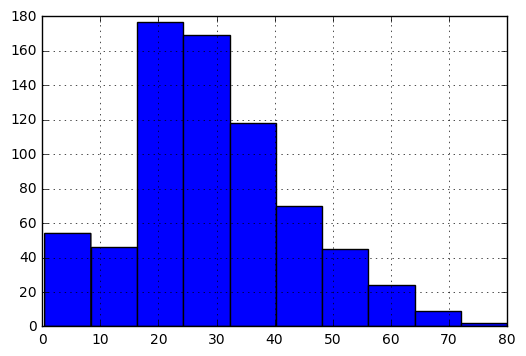

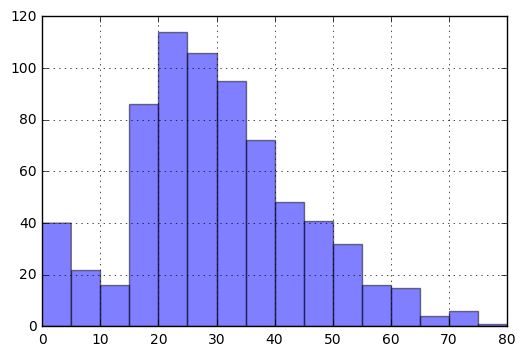

In [78]:
import pylab as P
df['Age'].hist()
P.show()

df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

# Nettoyage des données

C'est ici qu'on passe énormément de temps...

In [79]:
# Ajouter une colonne :
df['Gender'] = 4
datap['Gender'] = 4
testp['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
datap['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
testp['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
datap['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
testp['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


In [80]:
df['Gender'] 

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Gender, dtype: int32

Il y a des passagers pour qui nous ne savons pas l'age.  Et pourtant nos modèles en auront besoin.  Nous pourrions (comme première essaie) remplir l'age avec la moyenne, mais nous avons vu que la distribution n'est pas idéal pour une telle supposition.  Essayons avec le médian par sex et par classe :

In [81]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages    

#nettoyage de donnée de datap et testp
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = datap[(datap['Gender'] == i) & \
                              (datap['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = testp[(testp['Gender'] == i) & \
                              (testp['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 45. ,  28.5,  24. ],
       [ 39. ,  26. ,  23. ]])

In [82]:
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

datap['AgeFill'] = datap['Age']

datap[ datap['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

testp['AgeFill'] = testp['Age']

testp[ testp['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
10,0,3,NaN,NaN
22,0,1,NaN,NaN
29,1,3,NaN,NaN
33,1,3,NaN,NaN
36,1,3,NaN,NaN
39,0,3,NaN,NaN
41,0,1,NaN,NaN
47,0,3,NaN,NaN
54,1,2,NaN,NaN
58,0,3,NaN,NaN


In [83]:
# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        datap.loc[ (datap.Age.isnull()) & (datap.Gender == i) & 
                (datap.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
datap[ datap['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        testp.loc[ (testp.Age.isnull()) & (testp.Gender == i) & 
                (testp.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
testp[ testp['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
10,0,3,NaN,24.0
22,0,1,NaN,45.0
29,1,3,NaN,23.0
33,1,3,NaN,23.0
36,1,3,NaN,23.0
39,0,3,NaN,24.0
41,0,1,NaN,45.0
47,0,3,NaN,24.0
54,1,2,NaN,26.0
58,0,3,NaN,24.0


In [84]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
datap['AgeIsNull'] = pd.isnull(datap.Age).astype(int)
testp['AgeIsNull'] = pd.isnull(testp.Age).astype(int)

C'est parfois commode d'avoir des critères bêtement dérivées d'autres critères.

Nous avons ajouté trois nouvelles colonnes (critères).  Regardez de nouveau le dataframe.

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,25.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,27.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,14.0,0


In [24]:
# Feature engineering

In [85]:
# parch is number of parents or children on board.
df['FamilySize'] = df['SibSp'] + df['Parch']
datap['FamilySize'] = df['SibSp'] + df['Parch']
testp['FamilySize'] = df['SibSp'] + df['Parch']

# Class affected survival.  Maybe age will, too.
# Who knows, maybe the product will be predictive, too.  Let's set it up.
df['Age*Class'] = df.AgeFill * df.Pclass
datap['Age*Class'] = df.AgeFill * df.Pclass
testp['Age*Class'] = df.AgeFill * df.Pclass

Exercices :

* Explorez.

In [26]:
df['Age*Class']

0       66.0
1       38.0
2       78.0
3       35.0
4      105.0
5       75.0
6       54.0
7        6.0
8       81.0
9       28.0
10      12.0
11      58.0
12      60.0
13     117.0
14      42.0
15     110.0
16       6.0
17      60.0
18      93.0
19      64.5
20      70.0
21      68.0
22      45.0
23      28.0
24      24.0
25     114.0
26      75.0
27      19.0
28      64.5
29      75.0
       ...  
861     42.0
862     48.0
863     64.5
864     48.0
865     84.0
866     54.0
867     31.0
868     75.0
869     12.0
870     78.0
871     47.0
872     33.0
873    141.0
874     56.0
875     45.0
876     60.0
877     57.0
878     75.0
879     56.0
880     50.0
881     99.0
882     66.0
883     56.0
884     75.0
885    117.0
886     54.0
887     19.0
888     64.5
889     26.0
890     96.0
Name: Age*Class, dtype: float64

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,0,1,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,0,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,0,0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,0,0,105.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,25.0,1,0,75.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,54.0,0,0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2.0,0,4,6.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,27.0,0,2,81.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,14.0,0,1,28.0


In [36]:
# We can find the columns with strings.
df.dtypes[df.dtypes.map(lambda x: x=='object')]

# We can drop some columns we think won't be interesting.
# Most of these are string columns (see above).  We made a
# copy of age.
df_clean = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'],
                   axis=1)

# Numpy arrays are more convenient for doing maths.
train_data = df_clean.values

# Compare to the original data array.

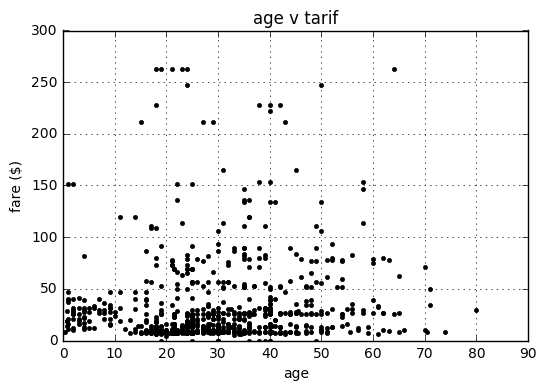

In [29]:
#graphique montrant le tarif selon l'age

import matplotlib.pyplot as plt

plt.figure()
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('fare ($)')
plt.plot(df['AgeFill'], df['Fare'], 'k.')
plt.axis([0, 90, 0, 300])
plt.grid(True)
plt.show()


In [ ]:
#ici nous avons une visualisation de la regression linaire de l'age par rapport au tarif

Coefficients: 
 [[ 0.49090737]]
Residual sum of squares: 3036.64
Variance score: 0.05


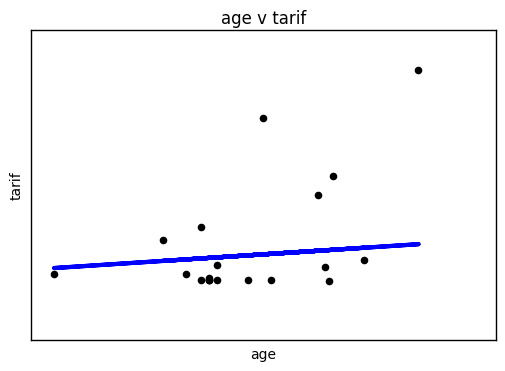

In [95]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset

# Split the data into training/testing sets
data_X_train = datap['AgeFill'].to_frame()[:-20]
data_X_test = testp['AgeFill'].to_frame()[-20:]

# Split the targets into training/testing sets
data_y_train = datap['Fare'].to_frame()[:-20]
data_y_test = testp['Fare'].to_frame()[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(data_X_test) - data_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_X_test, data_y_test))

# Plot outputs
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('tarif')
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df['AgeFill'].to_frame()
y = df['Fare'].to_frame()
model.fit(X, y)
print(u'le tarif pour 10 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[10]])[0][0]))
print(u'le tarif pour 22 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[22]])[0][0]))
print(u'le tarif pour 40 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[40]])[0][0]))
print(u'le tarif pour 60 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[60]])[0][0]))
print(u'le tarif pour 80 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[80]])[0][0]))

le tarif pour 10 ans doit coûter 23.45 $
le tarif pour 22 ans doit coûter 28.94 $
le tarif pour 40 ans doit coûter 37.19 $
le tarif pour 60 ans doit coûter 46.36 $
le tarif pour 80 ans doit coûter 55.52 $


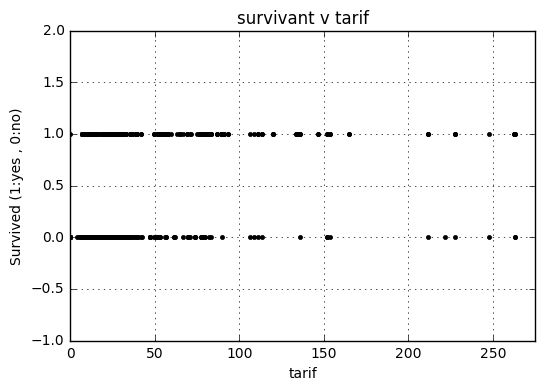

In [96]:
#graphique montrant le tarif selon survivant ou non

import matplotlib.pyplot as plt

plt.figure()
plt.title('survivant v tarif')
plt.xlabel('tarif')
plt.ylabel('Survived (1:yes , 0:no)')
plt.plot(df['Fare'], df['Survived'], 'k.')
plt.axis([0, 275, -1, 2])
plt.grid(True)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df['Fare'].to_frame()
y = df['Survived'].to_frame()
model.fit(X, y)
print(u'poourcentage d\'être survivant si on a payé 20: {px:.2f}'.format(
        px=model.predict([[20]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 50: {px:.2f}'.format(
        px=model.predict([[50]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 100: {px:.2f}'.format(
        px=model.predict([[100]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 150: {px:.2f}'.format(
        px=model.predict([[150]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 200: {px:.2f}'.format(
        px=model.predict([[200]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 250: {px:.2f}'.format(
        px=model.predict([[250]])[0][0]))

poourcentage d'être survivant si on a payé 20: 0.35
poourcentage d'être survivant si on a payé 50: 0.43
poourcentage d'être survivant si on a payé 100: 0.55
poourcentage d'être survivant si on a payé 150: 0.68
poourcentage d'être survivant si on a payé 200: 0.81
poourcentage d'être survivant si on a payé 250: 0.93


In [33]:
#tester le modèle de régression, sans doute en modéle de courbe au vu du résultat précédant

In [34]:
#nombre de survivant
Survived = data[0::,1] == "1"
np.sum(Survived)

342

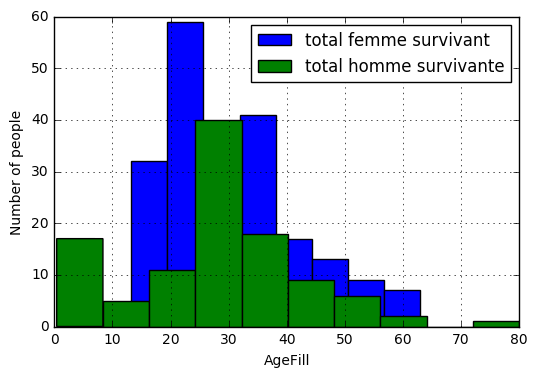

In [53]:
from matplotlib import pyplot

hommesurvivant=(df['Survived']==1) & (df['Sex']=='male')
femmesurvivante=(df['Survived']==1) & (df['Sex']=='female')

pyplot.hist(df[femmesurvivante]['AgeFill'], label='total femme survivant')
pyplot.hist(df[hommesurvivant]['AgeFill'], label='total homme survivante')
pyplot.xlabel('AgeFill')
pyplot.ylabel('Number of people')
pyplot.legend(loc='upper right')
pyplot.grid(True)
pyplot.show()

In [54]:
# on peut remarquer qu'il y a beaucooup plus de femme surviante que les hommes et que l'age n'influence pas les données, 
#les proportions sont à peu prés les même selon l'age